# Ejercicio 2


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import collections

Estado n -> n solicitudes en el sistema <br>
\[    39/40     , 1/40                       , 0                          ,              0 , 0 , ..... 0 ] <br>
[ 1/30 * 39/40 , (29/30)*(39/40)+(1/30*1/40), (29/30)*(1/40)             ,              0 , 0 , ..... 0 ] <br>
[ 0            , 1/30 * 39/40               , (29/30)*(39/40)+(1/30*1/40), (29/30)*(1/40) , 0 , ..... 0 ]

La Matriz de transiciones va a ser de N*N siendo N la cantidad de iteraciones deseadas.

In [5]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}) #Seteo a 5 decimales
p = 1/40
q = 1/30

Cant_de_solic = 0

N = 4

def fillMatrix(matrix,N):
    matrix[0][0] = 1 - p
    matrix[0][1] = p
    for x in range(1,N-1):
        matrix[x][x-1] = q*(1-p)
        matrix[x][x] = (1-q)*(1-p)+(p*q)
        matrix[x][x+1] = (1-q)*p
    matrix[N-1][N-2] = q
    matrix[N-1][N-1] = 1-q

T = np.zeros(shape=(N,N)) 
fillMatrix(T,N)
print("Matriz de Transicion\n")
print(T)

Matriz de Transicion

[[0.97500 0.02500 0.00000 0.00000]
 [0.03250 0.94333 0.02417 0.00000]
 [0.00000 0.03250 0.94333 0.02417]
 [0.00000 0.00000 0.03333 0.96667]]


# B

In [6]:
def getMatrixZero(matrix):
    matrix[0]= [1 - p,p,0]
    matrix[1] = [ q*(1-p), (1-q)*(1-p)+(p*q) ,(1-q)*p]
    matrix[2] = [0 , q , 1-q ]


In [29]:
itera = 100000

T = np.zeros(shape=(3,3)) 
getMatrixZero(T) 

print(T)

[[0.97500 0.02500 0.00000]
 [0.03250 0.94333 0.02417]
 [0.00000 0.03333 0.96667]]


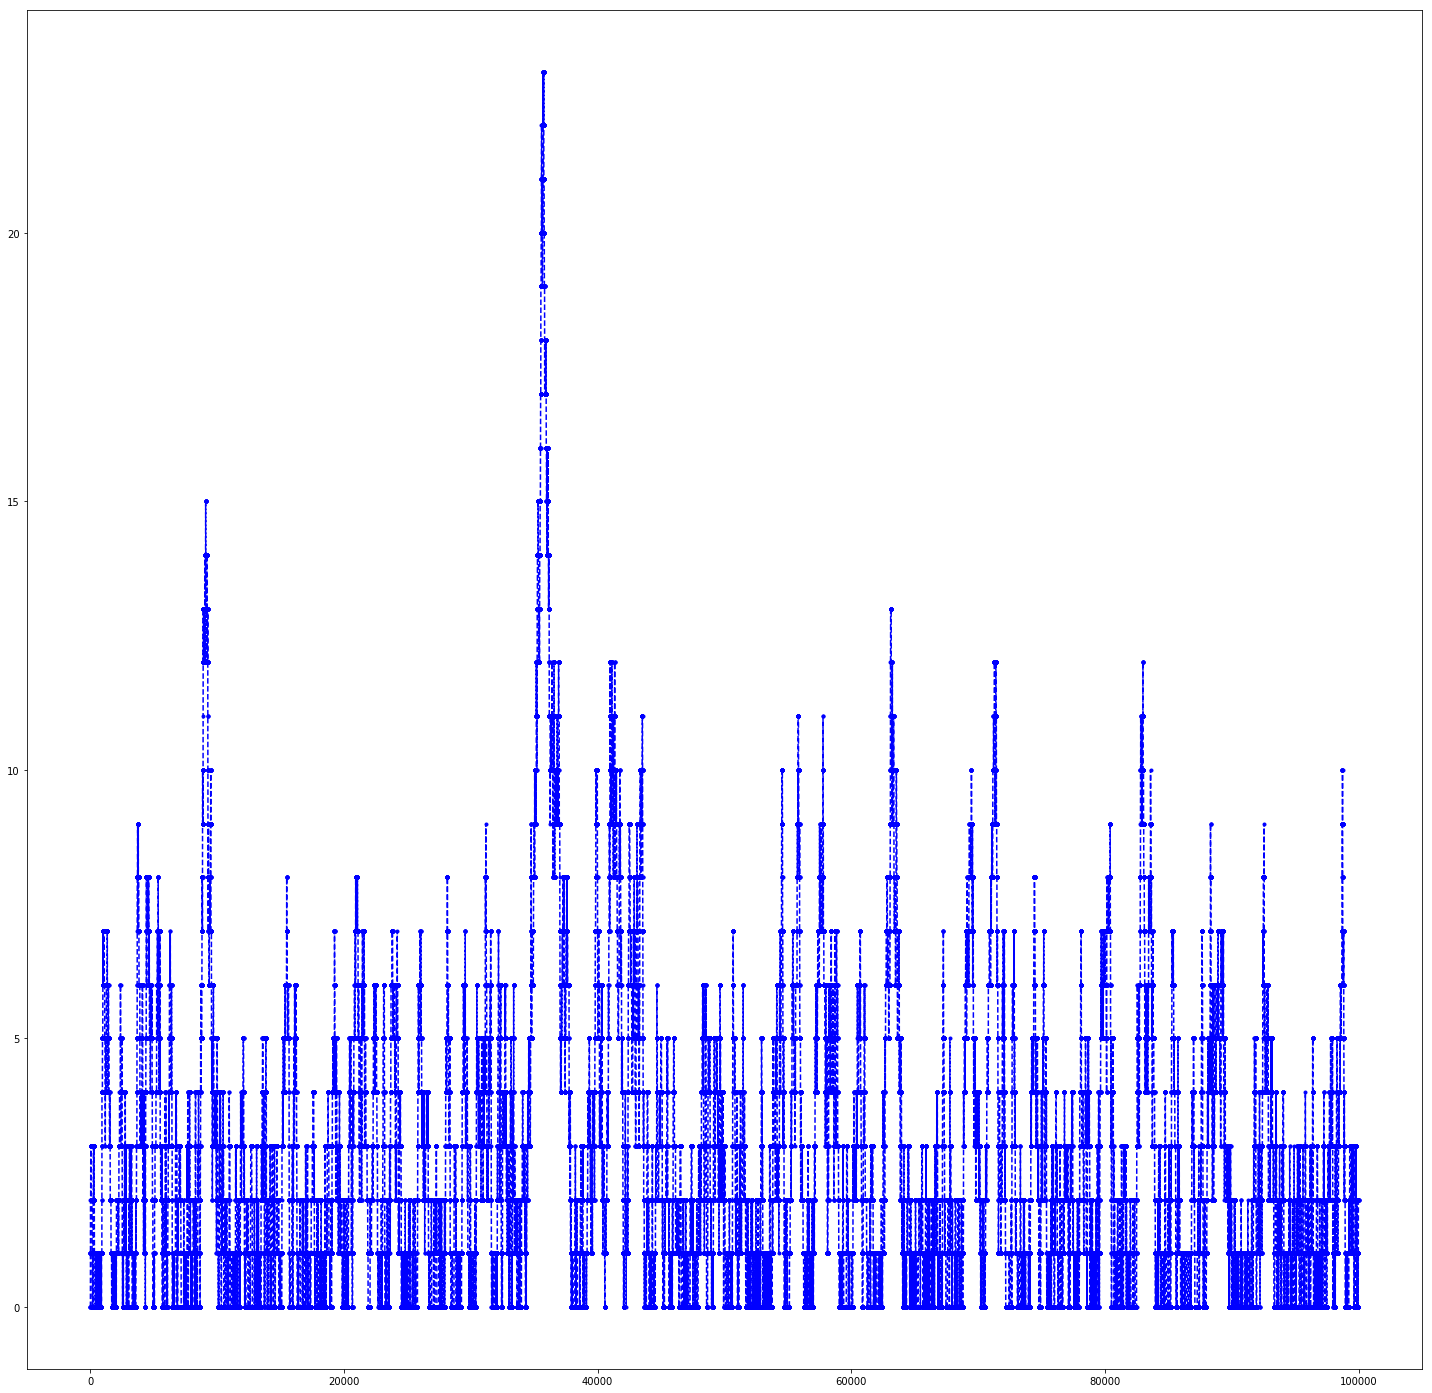

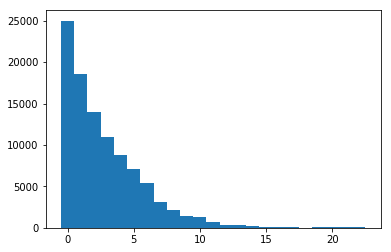

24997
Porcentaje de iteraciones que no esta procesando %24.997


In [34]:
def getSolicitudes(N) :
    cantidadSolicitudesActual = 0
    cantidadSolicitud = []
    estaProcesando = False
    
    for x in range(N):
        probLlegada = np.random.uniform(low=0, high=1, size=1)[0]
        probSalida = np.random.uniform(low=0, high=1, size=1)[0]
        # Tomamos como que si la iteracion de 10milisegundos arrranca con 0 solicitudes, 
        # en la misma no se procesa nada.
        cantidadSolicitud.append(cantidadSolicitudesActual)
        if ((estaProcesando) and (probSalida <= 1/30)):
            estaProcesando = False
            cantidadSolicitudesActual -= 1
        if (cantidadSolicitudesActual >= 1):
            estaProcesando = True
        if (probLlegada <= 1/40):
            cantidadSolicitudesActual += 1
    return cantidadSolicitud

solicitudes = getSolicitudes(itera)
fig= plt.figure(figsize=(25,25))
plt.plot(solicitudes, linestyle='--' ,marker='.', color='b') 
plt.show()
bins = np.arange(-0.5,max(solicitudes)+0.5,1)
plt.hist(solicitudes, bins=bins)
plt.show()
counter = np.array(solicitudes)
cantidadSinProcesar = collections.Counter(solicitudes).get(0)
print(cantidadSinProcesar)
print("Porcentaje de iteraciones que no esta procesando %" + str((cantidadSinProcesar/itera) * 100))

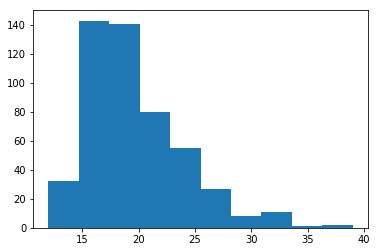

In [12]:
cantidades = []
for x in range(500):
    solicitudes = getSolicitudes(itera)
    cantidades.append(max(solicitudes))

plt.hist(cantidades)
plt.show()
